# **Student Exam Performance Prediction**
I have demonstrated how **study hours** influence **exam scores** using **linear regression**.  


✅ Libraries imported successfully


Saving StudentPerformanceFactors.csv to StudentPerformanceFactors (1).csv
Uploaded file: StudentPerformanceFactors (1).csv


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
print("Dataset shape:", data.shape)

print("\nColumns in dataset:")
print(data.columns.tolist())

print("\nMissing values in each column:")
print(data.isnull().sum())

print("\nDataset statistics:")
print(data.describe())

data.head(10)


Dataset shape: (6607, 20)

Columns in dataset:
['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']

Missing values in each column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
P

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


# **Data Visualization**
I have visualized important relationships:
- Scatter plot between **study hours** and **exam score**  
- Correlation heatmap between numerical features

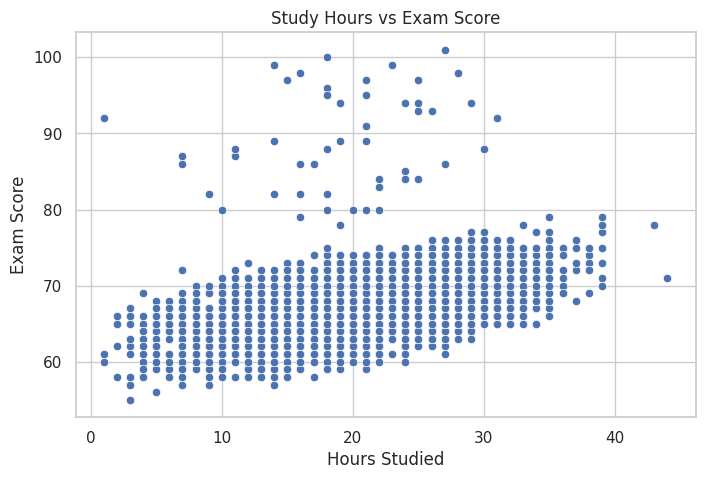

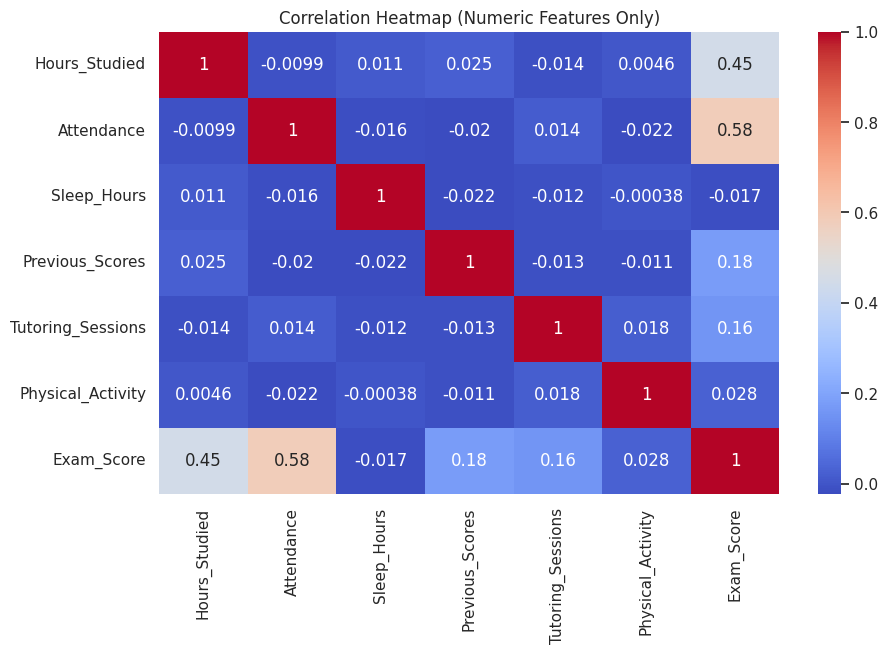

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x="Hours_Studied", y="Exam_Score", data=data)
plt.title("Study Hours vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()

numeric_data = data.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


# **Train-Test Split**
I have selected **Hours_Studied** as the predictor (X) and **Exam_Score** as the target (y).  
Then split into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

X = data[["Hours_Studied"]]
y = data["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 5285
Testing set size: 1322


# **Train Linear Regression Model**
I fitted a simple linear regression model on the training data and displayed slope & intercept.


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print("Model trained successfully ✅")
print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)


Model trained successfully ✅
Slope (coefficient): 0.285668744443087
Intercept: 61.51116746904424


# **Make Predictions**
Tested the model on unseen test data and compare actual vs predicted scores.
python
Copy code


In [ ]:
y_pred = model.predict(X_test)

results = pd.DataFrame({
    "Hours_Studied": X_test["Hours_Studied"].head(10).values,
    "Actual Score": y_test.head(10).values,
    "Predicted Score": y_pred[:10]
})

results


,Hours_Studied,Actual Score,Predicted Score
0,20,65,67.224542
1,22,65,67.795880
2,21,71,67.510211
3,12,64,64.939192
4,21,66,67.510211
5,21,66,67.510211
6,37,72,72.080911
7,24,66,68.367217
8,17,70,66.367536
9,16,70,66.081867


# **Evaluate Model Performance**
Evaluated using:
- **MSE (Mean Squared Error)**  
- **RMSE (Root Mean Squared Error)**  
- **R² Score (goodness of fit)**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# R² Score (coefficient of determination)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Model Performance:
Mean Squared Error (MSE): 10.85592128879332
Root Mean Squared Error (RMSE): 3.294832513010839
R² Score: 0.2319868674542106


# **Visualize Predictions**
Finally, I compared actual vs predicted exam scores on a scatter plot with regression line.

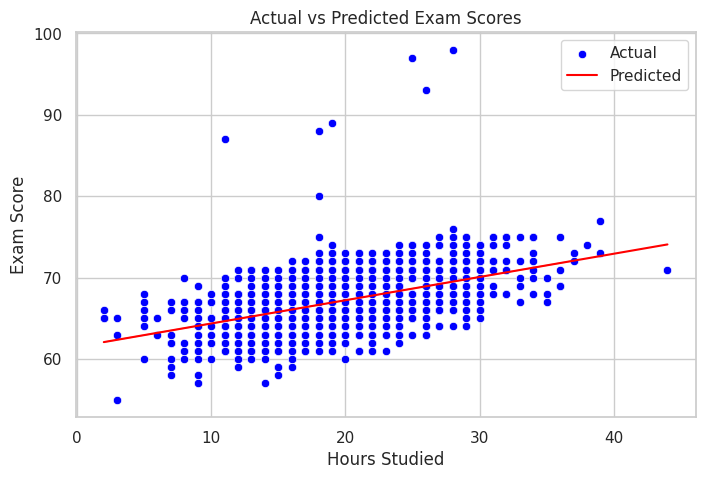

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test["Hours_Studied"], y=y_test, label="Actual", color="blue")
sns.lineplot(x=X_test["Hours_Studied"], y=y_pred, label="Predicted", color="red")
plt.title("Actual vs Predicted Exam Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.show()
